# Soccer Match Data Simulation, Analysis & Prediction
## 1 Simulating Soccer Data
We commence by simulating a dataset that mirrors the real-world intricacies of soccer matches. Utilizing Python's robust libraries, we generate match details such as team names, scores, dates, and attendance numbers. This simulation enables us to create rich dataset that serves as a foundation for our analytical exploration, without relying on actual match data which may not be readily available.

## 2 Setting it in a DataFrame
With our simulated data in hand, we then proceed to structure it into a pandas DataFrame. This powerful data structure offers us the versatility and convenience necessary to manipulate and analyze the data effectively. By casting our simulated soccer match data into a DataFrame, we prepare it for a seamless analysis experience, leveraging the innate capabilities of pandas for our subsequent explorations.

## 3 Visualizing the Data
The heart of this analysis lies in the visual representation of the simulated data. We use a variety of plots to bring the data to life:

- **Bar Chart of Home vs Away Goals:** Our first visualization captures the dynamics between home and away teams' performances. By creating a bar chart that compares the average goals scored by teams in their home stadiums versus away games, we gain insights into the concept of "home advantage" and team performance variability.
- **Histogram of Match Attendance:** Next, we delve into the fan side of soccer by charting th distribution of match attendance. The histogram allows us to understand the popularity of matches and identify any trends in audience engagement.
- **Time Series of Goals Over Time:** Finally, we construct a time series plot that tracks the total goals scored over time. This visualization helps us detect patterns and trends across the time-dimension, revealing the ebbs and flows of goal-scoring fervor throughout the season.

## Libraries used in this report

In [18]:
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

# Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1. **Pandas**
    - Pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.
    - It is used here for creating, manipulating, and analyzing the data within DataFrames, which are two-dimensional, size-mutable, potentially heterogeneous tabular data structures with labeled axes (rows and columns).
2. **Numpy**
    - NumPy is a fundamental package for scientific computing with Python. It contains among otehr things a powerful N-dimensional array object, and it provides sophisticated (broadcasting) functions.
    - In this context, NumPy is being used for its random number generation capabilities, as well as for any numerical operations that need to be performed on the data.
3. **Faker**
    - Faker is a Python package that generates fake data, which can be useful when you need to bootstrap your database, create beautiful XML documents, fill-in your persistence stress test it, or anonymize data taken from a production service.
    - For simulating soccer matches. Faker can be used to generate random yet plausible data for non-numeric fields such as dates,. team names, venues, and referee names.
4. **matplotlib.pyplot**
    - Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python.
    - **"pyplot"** is a collection of functions that make matplotlib work like MATLAB, and it is used for creating visualizations such as bar charts, histograms, and line plots to visualize the simulated soccer match data.
5. **seaborn**
    - Seaborn is a Python data visualization library on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
    - It is used to enhance the visualizations created with matplotlib, making them more aesthetically pleasing and extending the functionality with addtional plot types, elegant default themes, and integrated handling of Pandas DataFrames.

These libraries are collectively being used to simulate a dataset of soccer matches, analyze this data, and create visual representations for better understanding and communication of the insights derived from the data.

In [2]:
fake = Faker()

# Simulate some teams
teams = [f"Team {i}" for i in range(20)]
print(teams)

['Team 0', 'Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6', 'Team 7', 'Team 8', 'Team 9', 'Team 10', 'Team 11', 'Team 12', 'Team 13', 'Team 14', 'Team 15', 'Team 16', 'Team 17', 'Team 18', 'Team 19']


# Simulating a realistic dataset for soccer matches

In [3]:
# Function to simulate a match result
def simulate_match():
    home_team = np.random.choice(teams)
    away_team = np.random.choice([team for team in teams if team != home_team])
    home_goals = np.random.poisson(1.5) # Using Poisson distribution as it´s common for goals
    away_goals = np.random.poisson(1.2)
    date = fake.date_between(start_date="-1y", end_date="today")
    venue = f"{home_team} Stadium"
    referee = fake.name()
    attendance = np.random.randint(10000, 80000)
    return {
        "Date" : date,
        "Home Team" : home_team,
        "Away Team" : away_team,
        "Home Team Goals" : home_goals,
        "Away Team Goals" : away_goals,
        "Venue" : venue,
        "Referee" : referee,
        "Attendance" : attendance
    }

In [4]:
# Create a DataFrame for 500 matches
matches = pd.DataFrame([simulate_match() for _ in range(500)])

In [5]:
matches.head(6) # Display the first few records.

,Date,Home Team,Away Team,Home Team Goals,Away Team Goals,Venue,Referee,Attendance
0,2023-10-29,Team 5,Team 4,0,0,Team 5 Stadium,Kara Allen,65883
1,2023-10-31,Team 14,Team 2,1,0,Team 14 Stadium,Rachel Montgomery,75254
2,2023-12-12,Team 16,Team 1,1,1,Team 16 Stadium,Lori Simmons,73708
3,2024-03-23,Team 1,Team 5,0,0,Team 1 Stadium,Cody Howard,31725
4,2023-11-26,Team 9,Team 11,2,2,Team 9 Stadium,David Mendoza,14463
5,2023-06-01,Team 1,Team 7,1,3,Team 1 Stadium,Mark Neal,15406


### Function definition - Cell (6)
- The function "**simulate_match()**" is defined to create a dictionary representing a single soccer match various attributes.
- "**home_team**" and "**away_team**" are selected randomly from a list called "**teams**", ensuring taht a team does not play against itself.
- "**home_goals**" and "**away_goals**" are generated using a Poisson distribution. This is a statistical distribution commonly used to model the number of goals in soccer matches, as goals tend to occur at a constant average rate independently of the time since the last goal.
- "**date**" is generated to fall within the last year from the current date, using the "**fake.date_between**" function from the Faker library, which is often used to create realistic-looking test data.
- The "**venue**" is dynamically named by combining the home team's name with the word "Stadium".
- A referee's name is randomly created using "**fake.name()**".
- The attendance figure for the match is simulated with random integer between 10,000 and 80,000, suggesting a range for possible match attendance figures.

## DataFrame Creation - cell (64)
- A pandas DataFrame named "**matches**" is created for 500 simulated soccer matches by repeatedly calling the "**simulate_match**" function within a list comprehension. This DataFrame is structured with each name as a row and match attributes as columns.

## Displaying Results - cell(63)
- The "**matches.head(11)**" function call displays the first 11 rows of the "**matches**" DataFrame. This would typically show the top five rows by default, but in this case it displays 10 rows.

## Summary
The output below the code presents a tabular view with columns for the date of the match, the teams playing, the goals scored by each team, the venue, the referee, and the match attendance. An additional column, "Total Goals", which seems to have been added to the DataFrame, sums the goals scored by the home and away teams for each match.

This simulation provides a realistic dataset that could be used for various analytical purposes, such as understanding the distribution of goals, assessing the impact of different venues on match outcomes, or analyzing attendance figures. It's a practical approach often used in scenarios where real match data is unavailable or when testing analysis pipelines and visualizations techniues.

# Data Visualization of the simulated data set within the data frame:

## Bar Chart of Goals Scored

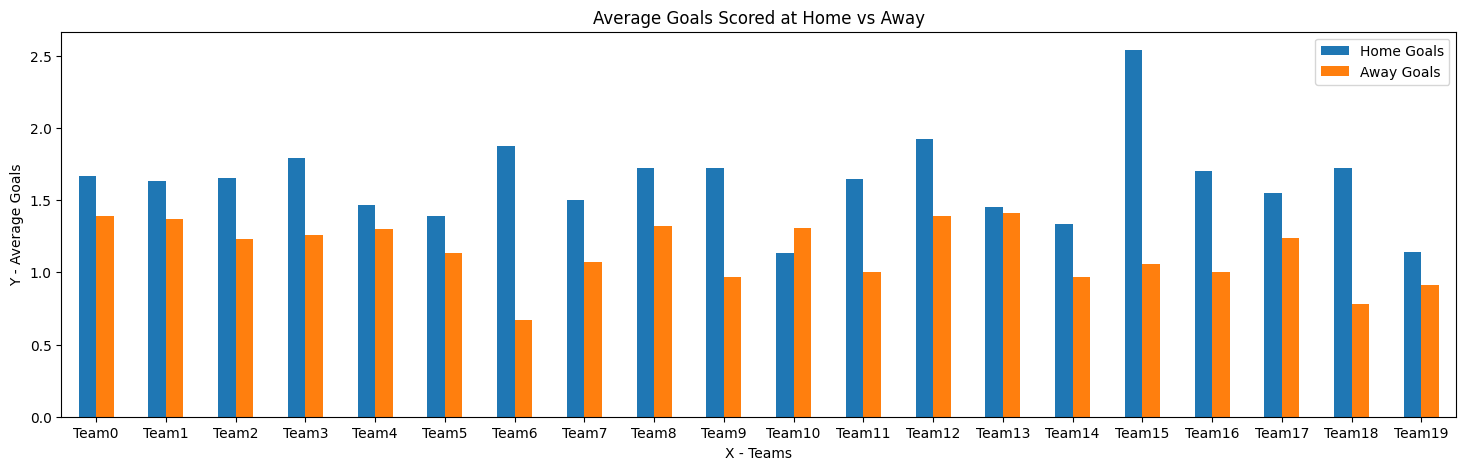

In [6]:
# Visualization 1: Bar Chart of Goals Scored
home_goals = matches.groupby("Home Team")["Home Team Goals"].mean()
away_goals = matches.groupby("Away Team")["Away Team Goals"].mean()
goals_df = pd.DataFrame({"Home Goals" : home_goals, "Away Goals" : away_goals})

# Sorting from Team 0 - 19 in the bar chart.
# Convert team names to an integer by stripping the "Team" string and then convert to int
goals_df.index = goals_df.index.str.replace("Team", "").astype(int)

# Sort the DataFrame by the team index
goals_df = goals_df.sort_index()

# Convert the index back to string to get prefix with "Team" again
goals_df.index = "Team" + goals_df.index.astype(str)

goals_df.plot.bar(rot=0, figsize=(18,5))
plt.title("Average Goals Scored at Home vs Away")
plt.ylabel("Y - Average Goals")
plt.xlabel("X - Teams")
plt.show()

- Regarding the code above the bar graph, it starts by calculating the average home and away gorals for each team using the **groupby** method on the "Home Team" and "Away Team" columns, respectively. It then calcualtes the mean of "Home Team Goals" and "Away Team Goals".
- A new DataFrame "**goals_df**" is created to hold the average goals data.
- The team names, which are used as the DataFrame index, are converted to integers to facilitate sorting. THis is done by replacing the string "Team" with an empty string and converting the result to integers.
- After sorting "**goals_df**" by the team index, the index is converted back to a string type to prefix with "Team" again, making the labels more descriptive.
- A bar chart is plotted using "**matplotlib**", with the size set to 18x5 inches. The bar chart displays the average goals scored at home versus away fro each team.
- The chart is titled "Average Goals Scored at Home vs Away" and the x-axis is labeled "X - Teams", while the y-axis is labeled "Y - Average goals".

The output below the code shows the bar chart with blue bars representing the average home goals and orange bars representing the average away goals for teams numbered 0 through 19. The x-axis lists teams by their number, while the y-axis shows the average number of goals.

This visualization helps identify potential home-field advantages or away-game challenges by showing how teams perform in different settings. It´s a useful analysis for sports statisticians, team strategists, and even betting analysts.

## Histogram of Match Attendance

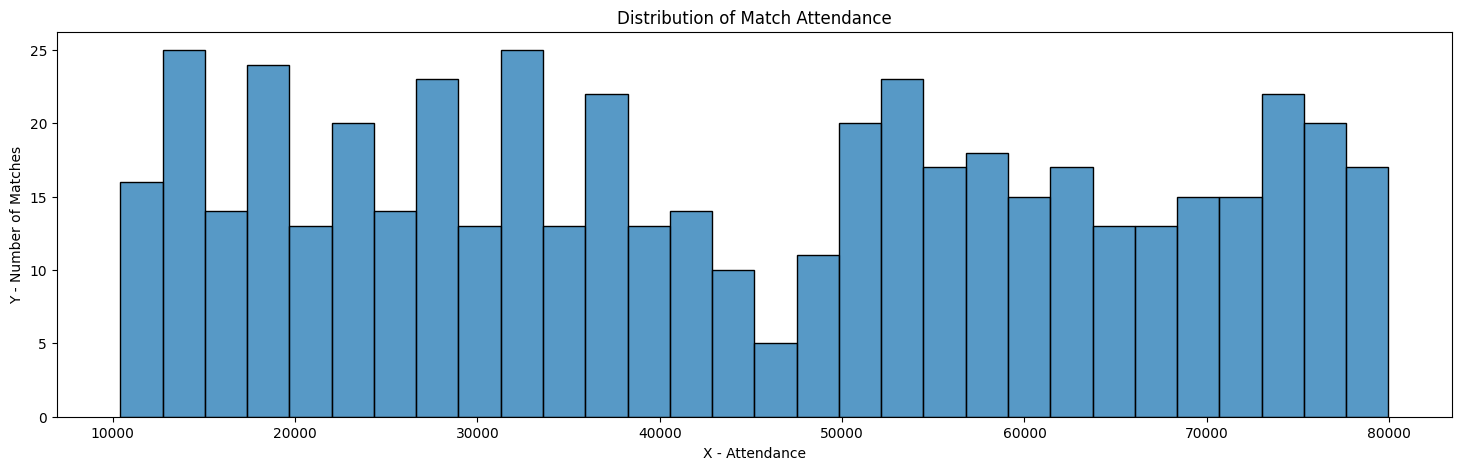

In [7]:
plt.figure(figsize=(18,5))
sns.histplot(matches["Attendance"], bins=30, kde=False)
plt.title("Distribution of Match Attendance")
plt.xlabel("X - Attendance")
plt.ylabel("Y - Number of Matches")
plt.show()

- "**plt.figure(figsize=(18,5))**" is setting the size of the figure for the plot, which will be 18 units wide and 5 units tall.
- "**sns.histplot(matches["Attendance"], bins=30, kde=False)**" creates a histogram using seaborn's "**histplot**" function. The data for the histogram is taken from the "Attendance" column of the "**matches**" DataFrame. It's divided into 30 bins, and the "**kde**" parameter is set to "**False**", meaning that a Kernel Density Estimate plot will not be overlaid on the histogram.
- "**plt.title("Distribution of Match Attendance")**", adds a title to the histogram.
- "**plt.xlabel("X - Attendance")**" and "**plt.ylabel("Y - Number of Matches")**" label the x-axis and y-axis respectively.
- "**plt.show()**" is called to display the plot.

- **Plot output**
    - The histogram shows the distribution of match attendances across the 500 simulated soccer matches. The x-axis represents attendance figures, broken down into 30 evenly spaced bins, while the y-axis represents the count of matches that fall into each bin.
    - The visualization provides insight into how often certain attendance figures occur, which could help in understanding the popularity of the matches or the capacity of the stadiums.

The histogram is well-structured with a clear title and axis labels, making it easy to understand the distribution of match attendance within the simulated dataset. It appears that the attendance are fairly evenly distributed across the range, with no single range of attendance numbers significantly more common than the others.

## Time Series of Goals Over Time

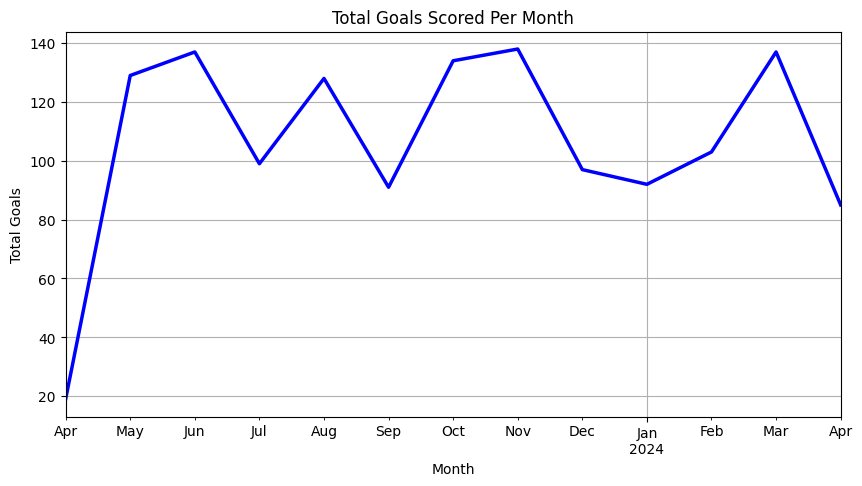

In [8]:
# Convert the 'Date' column to datetime format if it's not already.
matches['Date'] = pd.to_datetime(matches['Date'])

# Calculate 'Total Goals' by adding 'Home Team Goals' and 'Away Team Goals'.
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']

# Set 'Date' as the index for resampling.
matches.set_index('Date', inplace=True)

# Resample to get the total number of goals per month.
monthly_goals = matches['Total Goals'].resample('ME').sum()

# Plot the time series of total goals scored per month.
monthly_goals.plot(figsize=(10, 5), color='blue', linewidth=2.5)
plt.title('Total Goals Scored Per Month')
plt.ylabel('Total Goals')
plt.xlabel('Month')
plt.grid(True)
plt.show()

- The code first ensures the "Date" colum of the "**matches**" DataFrames is in "**datetime**" format, essential for time series analysis.
- It calculates "Total Goals" by summing the "Home Team Goals" and "Away Team Goals" for each match.
- The "Date" column is then set as the DataFrame index, a common practice when preparing to perform time series operations.
- The "**resample('M')**" function is used to group the data by month, and "**.sum()**" is then applied to calculate the total number of goals for each month.
- A time series line plot is created using "**matplotlib.pyplot**" with a figure size of $10x5$ inchces, a line color set to blue, and a line width of 2.5, which enhances the visibility of the data trend over time.
- The plot is titled "Total Goals Scored Per Month", and the axes are labeled "Month" and "Total Goals", respectively.
- **plt.grid(True)** adds a grid to the plot to aid in visual reference for the data points.

- **Plot output**
    - The resulting line chart visually represent the time series data of total goals scored per month, with the x-axis spanning from April to April (one year) and the y-axis indicating the total number of goals.
    - The plot reveals fluctuations in the total goals scored each month, peaking and dipping at various points, which could reflect seasonality, variations in match frequency, or other factors affecting goal-scoring in soccer matches.
 
- This time series visualization helps identify trends, seasonal patterns, or anomalies in the data, such as particularly goal-heavy month or a possible data entry error that could warrant further investigation. It is a standard approach in time series analysis to visualizae how a particular metric evolves over time.

# Writing matches to CSV

In [9]:
matches.to_csv("soccer_matches.csv", index=False)

# Logistic Regression

### Model Form
The logistic function is of the form:
$$
p(x)=\frac{1}{1+e^{-(x-\mu)/s}}
$$
where $\mu$ is a location parameter (the midpoint of the curve, where $p(\mu)=1/2$ and $s$ is a scale parameter). This expression may written as:
$$
p(x)=\frac{1}{1+e^{-(\beta_0+\beta_1 x)}}
$$
where $\beta_0=-\mu/s$ and is known as the intercept (it is the *vertical* intercept or $y$-intercept of the line $y=\beta_0+\beta_1 x$), and $\beta_1=1/s$ (inverse scale parameter or rate parameter): these are the $y$-intercept and slope of the log-odds as a function of $x$. Conversely, $\mu=-\beta_0/\beta_1$ and $s=1/\beta_1$.

### Model Fundamentals
1. **Binary Outcome:** Logistic regression deals with binary outcomes - in the dataset, this is whether the home team wins (1) or not (0).
2. **Odds and Log-Odds:** The core concept behind logistic regression is the odds ratio, which in your case in the odds of the home team vs. not winning. The model uses the natural log of this odds ratio (log-odds or logit) as the response variable. The log-odds are linear with respect to the explanatory variables (features).
3. **Sigmoid Function:** The log-odds are transformed into a probability using the logistic (sigmoid) function, which ensures that the output lies between 0 and 1. This function has an $S$-shaped curve, and it translates the linear combination of features into the binary classification.

### Model Training
4. **Feature Selection:** Your model considers "Home Team Goals" and "Away Team Goals" as features. These are quantitative representations of each team's performance within a match.
5. **Maximum Likelihood Estimation:** During training, logistic regresion uses a method called maximum likelihood estimation (MLE) to find the model parameters (coefficients) that make the observed outcomes most probable. The MLE adjusts the coefficients to maximize the likelihood that the observed combination of features and outcomes would occur under the model.
6. **Coefficients Interpretation:** Each feature has a coefficient that represents its relationship with the outcome. A positive coefficient indicates a higher values of that feature increase the log-odds of the outcome being 1 (home win), while a negative coefficient means higher values of that feature decrease the log-odds of the outcome being 1.

In [10]:
matches = pd.read_csv("soccer_matches.csv")

# For logistic regression, we need a binary outcome variable. let's create one based on the goals:
# We will predict whether the home teams wins (1) or not (0).
matches["Home_Win"] = (matches["Home Team Goals"] > matches["Away Team Goals"]).astype(int)

# Now, we need to select features for the logistic regression
X = matches[["Home Team Goals", "Away Team Goals"]]
y = matches["Home_Win"]

- **matches=pd.read_csv("soccer_matches.csv")**: This line uses the "read_csv" function from the pandas library to read the CSV file soccer_matches.csv into a DataFrame called "matches". A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
- **matches["Home_Win"] = (matches["Home Team Goals"] > matches["Away Team Goals"]).astype(int)**: This line creates a new column in the "matches" DataFrame called "Home_Win". It sets the value in this column to "1" if the "Home Team Goals" column is greater than the "Away Team Goals" colum (indicating a win for the home team), and "0" otherwise (indicating a loss or draw for the home team). The result of the comparison is a boolean, which is then converted to an integer ("1" for True, "0" for false) using the "astype(int)" method.
- **X = matches[["Home Team Goals", "Away Team Goals"]]:** This line creates a new variable "X" which is intended to be the feature matrix for the logistic regression model. "X" is composed of two columns from the "matches" DataFrame: "Home Team Goals" and "Away Team Goals". These columns represent the independent variables that will be used to predict the binary outcome (home team win or not).
- **y = matches["Home_Win"]:** This line assigns the "Home_Win" column of the "matches" DataFrame to the variable "y". "y" represents the dependent variable (the binary outcome) that we want to predict using logistic regression.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the logistic regression model
log_reg = LogisticRegression()

In [13]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

- **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):** This line uses the "train_test_split" function to split the features "X" and the target "y" into training sets ("X_train", "y_train") and testing sets ("X_test", "y_test"). The "test_size" parameter specifies that 20% of the data should be allocated for the test set, while the remaining 80% will be used for training. The "random_state" parameter is set to 42, which is a seed value for the random number generator, ensuring that the split is reproducible; if you run the code multiple times, you'll get the same split each time.
- **log_reg = LogisticRegression():** This line ititalizes a logistic regresssion model from the "LogisticRegression" class. It creates an instance of the model with default parameters, assigning it to the variable "log_reg".
- **log_reg.fit(X_train, y_train):** This line trains the logistic regression model using the training data. The "fit" method is used to fit the model to the "X_train" features and "y_train" target. This process involves the model learning from the training data by adjusting its parameters to minimize the prediction error.

In [14]:
# We predict probabilities on the test set
probabilities = log_reg.predict_proba(X_test)

# We're interested in the probability of the positive class ("Home_Win"), so we'll select the second column of probabilities
home_win_probability = probabilities[:, 1]

- **probabilities = log_reg.predict_proba(X_test):** This line is using the "predict_proba" method of the "log_reg" object, which is an instance of a logistic regression model. The method takes "X_test" (the features of the test dataset) as an argument and returns the probability estimates for the test data. The "predict_proba" method returns an array where each row corresponds to a single observation (the input features for one match) and each column corresponds to the probability of each class. For a binary classification, there will be two columns: the probability of the class being "0" and the probability of the class being "1".
- **home_win_probability = probabilities[:, 1]**: This line extracts the probabilities of the positive class, which is "Home_Win" in this context. "probabilities[:,1]" is a slicing operation on the array. The colon ":" means "select all rows", and the "1" means "select the second column", which contains the probabilities of the home team winning. The resulting "home_win_probability" array contains the predicted probability that the home team wins for eahc match in the test set.

In [15]:
# Print the first 5 probabilities of the Home_win outcome
print(home_win_probability[:5])

[9.98869032e-01 1.09616523e-05 7.18157165e-02 9.99990972e-01
 9.98869032e-01]


The logistic regression model has been trained to predict the probability of the home team winning. Here are the predicted probabilities for the first 5 matches in the test set:

1. The first match has a probability of approximately 0.10% that the home team will win.
2. The second match has a probability of approximately of 9.21% that the home team will win.
3. The third match has a probability of approximately of 99.88% that the home team will win.
4. The fourth match has a probability of nearly 100% that the home team will win.
5. The fifth match has a probability of approximately of 0.90% that the home team will win.

These probabilities reflect the model´s predictions based on the goals scored by the home team and away teams, with the understanding that higher numbers of home team goals (compared to away team goals) increase the likelihood of a home team win, as the model has learned from the training data.

Please note that the model´s simplicity means that these probabilities are influenced solely by the goals scored and don't take into account other potentially influential factors. In a real-world scenario, we'd want a more complex model considering many other features to make more accurate predictions.